In [48]:
import pandas as pd
import datetime 
import matplotlib.pyplot as plt

In [85]:
calendar = pd.read_csv("../data/calendar_afcs2023.csv")
sales_train = pd.read_csv("../data/sales_train_validation_afcs2023.csv")
prices = pd.read_csv("../data/sell_prices_afcs2023.csv")

In [95]:
sales_train.head()

,id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,FOODS_3_001_TX_3_validation,0,2,1,3,0,0,1,0,2,...,0,0,0,0,2,0,0,5,2,0
1,FOODS_3_002_TX_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,FOODS_3_003_TX_3_validation,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,1,0,0
3,FOODS_3_004_TX_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
4,FOODS_3_005_TX_3_validation,0,1,1,0,0,1,2,0,0,...,0,4,2,1,1,0,1,0,4,0


In [86]:
#convert date columns
calendar['date_string'] = calendar['date'].apply(lambda x: x.split('/'))
calendar['date_dt'] = calendar['date_string'].apply(lambda x: datetime.date(int(x[2]), int(x[0]), int(x[1])))
calendar['date_dt'] = pd.to_datetime(calendar['date_dt'])

In [87]:
calendar

,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_TX,date_string,date_dt
0,1/29/2011,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,"[1, 29, 2011]",2011-01-29
1,1/30/2011,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,"[1, 30, 2011]",2011-01-30
2,1/31/2011,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,"[1, 31, 2011]",2011-01-31
3,2/1/2011,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,1,"[2, 1, 2011]",2011-02-01
4,2/2/2011,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,0,"[2, 2, 2011]",2011-02-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,6/15/2016,11620,Wednesday,5,6,2016,NaN,NaN,NaN,NaN,1,"[6, 15, 2016]",2016-06-15
1965,6/16/2016,11620,Thursday,6,6,2016,NaN,NaN,NaN,NaN,0,"[6, 16, 2016]",2016-06-16
1966,6/17/2016,11620,Friday,7,6,2016,NaN,NaN,NaN,NaN,0,"[6, 17, 2016]",2016-06-17
1967,6/18/2016,11621,Saturday,1,6,2016,NaN,NaN,NaN,NaN,0,"[6, 18, 2016]",2016-06-18


**Weekly total items sold**

In [90]:
#get total sales
sales = sales_train.sum()
sales = sales.iloc[1: ]
sales = pd.DataFrame(sales, columns=['total_sales'])
dates = calendar.loc[:1912, 'date_dt'].to_list()
sales['date'] = dates
sales = sales.set_index('date')

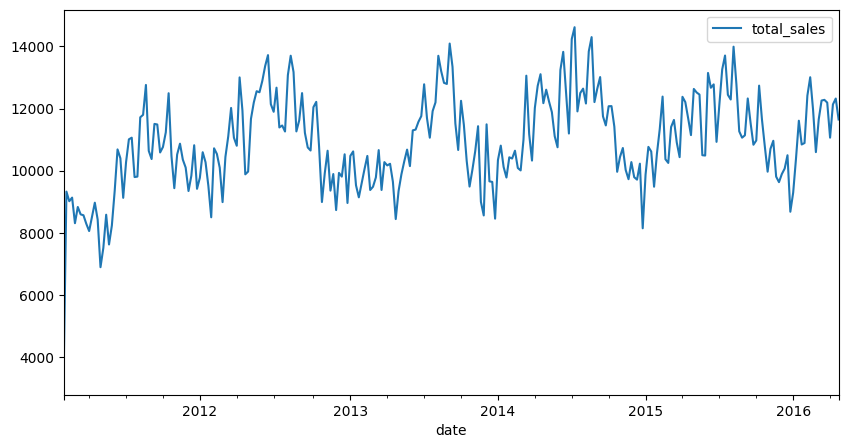

In [92]:
# Weekly total sales
sales.resample("W").sum().plot(style="-", figsize=(10, 5));

**Weekly average price**

In [93]:
mean_price = prices.groupby('wm_yr_wk')['sell_price'].mean()
mean_price = pd.merge(mean_price, calendar[['date_dt', 'wm_yr_wk']], how="right", on="wm_yr_wk")
mean_price = mean_price.drop('wm_yr_wk', axis=1)
mean_price['date_dt'] = pd.to_datetime(mean_price['date_dt'])
mean_price = mean_price.set_index('date_dt')

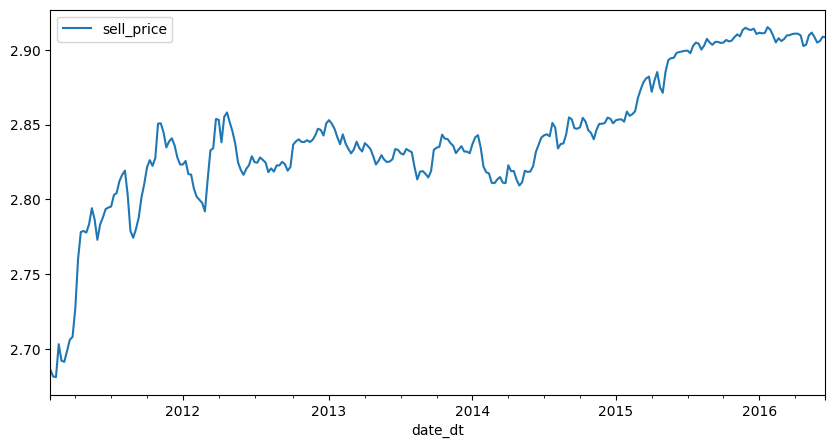

In [94]:
mean_price.resample("W").mean().plot(style="-", figsize=(10, 5));

**Weekly # different item solds**

In [108]:
s = sales_train.iloc[:, 1:].values
s[s>0] = 1
n_items = pd.DataFrame(s.sum(axis=0), columns=['n_items'])
n_items['date'] = calendar.loc[:1912, 'date_dt'].to_list()
n_items = n_items.set_index('date')

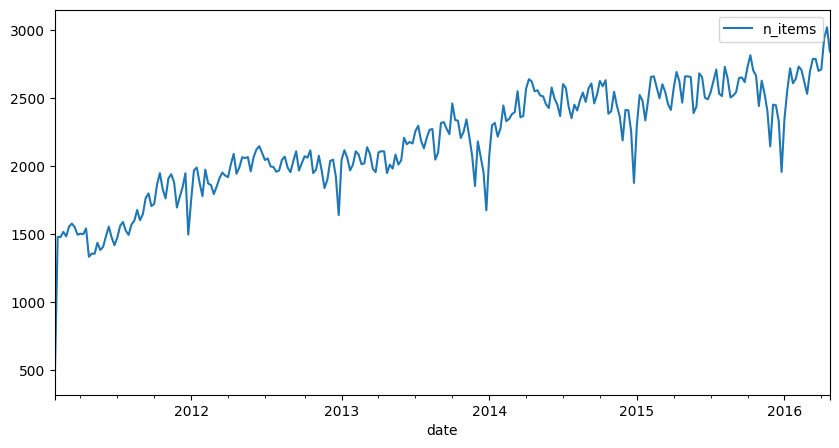

In [109]:
n_items.resample("W").sum().plot(style="-", figsize=(10, 5));